In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split as tts
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("shoe.csv")
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


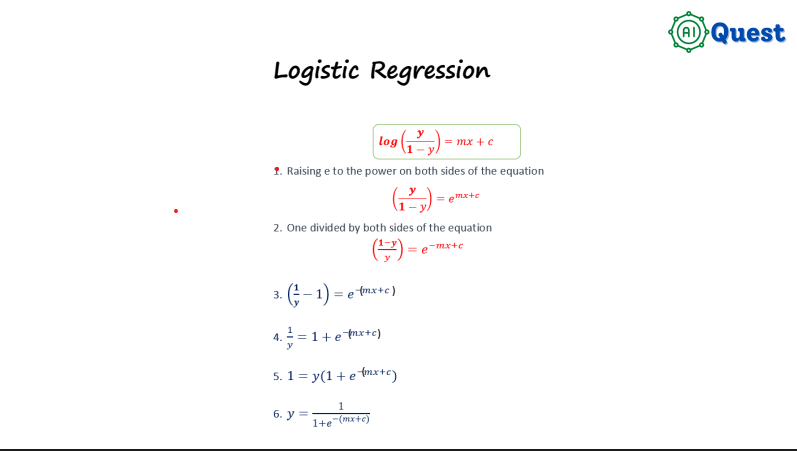

In [4]:
from IPython.display import Image
Image("logistic.png")

In [5]:
df.shape

(40, 2)

In [6]:
df.isnull().sum()

size(cm)    0
class(y)    0
dtype: int64

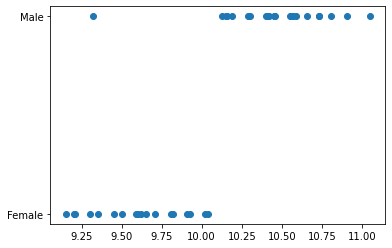

In [7]:
plt.scatter(df['size(cm)'],df['class(y)'])

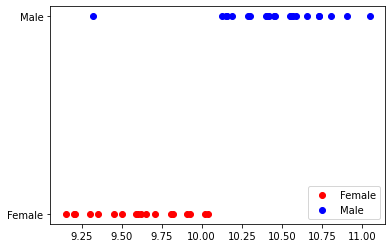

In [8]:
df1 = df[df['class(y)'] == 'Female']
df2 = df[df['class(y)'] == 'Male']

plt.scatter(df1['size(cm)'], df1['class(y)'], color = 'red', label='Female')
plt.scatter(df2['size(cm)'], df2['class(y)'], color = 'blue', label='Male')
plt.legend()


# Preprocessing

In [9]:
df['class(y)']=df['class(y)'].replace(['Male','Female'],[1,0])
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [10]:
x=df.drop('class(y)',axis=1)
y=df['class(y)']

In [11]:
x.head()

,size(cm)
0,9.500
1,10.125
2,10.410
3,9.810
4,11.050


In [12]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: class(y), dtype: int64

# Traning and Testing

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=42)

In [15]:
xtrain.head()

,size(cm)
13,10.91
31,9.91
34,10.16
8,9.71
17,9.93


# LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lreg = LogisticRegression()

# Trainning

In [18]:
lreg.fit(xtrain,ytrain)

LogisticRegression()

In [19]:
lreg.coef_

array([[2.47463511]])

In [20]:
lreg.intercept_

array([-24.90925884])

# Testing

In [21]:
lreg.predict_proba(xtest)

array([[0.21464894, 0.78535106],
       [0.52832341, 0.47167659],
       [0.16197908, 0.83802092],
       [0.36476622, 0.63523378],
       [0.08050842, 0.91949158],
       [0.42378052, 0.57621948],
       [0.22742863, 0.77257137],
       [0.13686847, 0.86313153],
       [0.86361669, 0.13638331],
       [0.82112044, 0.17887956],
       [0.27380062, 0.72619938],
       [0.7367278 , 0.2632722 ]])

In [22]:
lreg.predict_proba([[10]])

array([[0.5406371, 0.4593629]])

In [23]:
logistic_score=lreg.score(xtest,ytest)

In [24]:
lreg_pred=lreg.predict(xtest)
lreg_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [25]:
lreg.decision_function(xtest)

array([ 1.29712698, -0.11341504,  1.64357589,  0.55473644,  2.43545913,
        0.30727293,  1.22288792,  1.8415467 , -1.84565961, -1.52395705,
        0.97542441, -1.02903003])

In [26]:
log_score=lreg.score(xtest,ytest)
log_score

0.9166666666666666

# Kneighbors Clasifications

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
kn=KNeighborsClassifier(n_neighbors=7)
kn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [29]:
knn_pred=kn.predict(xtest)
knn_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [30]:
kn.predict_proba(xtest)

array([[0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.14285714, 0.85714286],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [31]:
lreg.predict(xtest)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [32]:
knn_score=kn.score(xtest,ytest)
knn_score

0.9166666666666666

# KNN Regressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
knr = KNeighborsRegressor(n_neighbors=2)

In [35]:
kn=knr.fit(xtest,ytest)

In [36]:
print(kn)

KNeighborsRegressor(n_neighbors=2)


In [37]:
knr.predict(xtest)    # prediction


array([1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 1. , 0. ])

In [38]:
knn_r2_score=knr.score(xtest,ytest)
knn_r2_score                                 # accuracy score

0.6666666666666667

# Plot Accuracy

In [39]:
d = {'Algorithm name': ['logistic_Regression','KNN classifier','KNN Regressor'], 'Accuracy': [log_score,knn_score,knn_r2_score]}

In [40]:
df=pd.DataFrame(d)
df

,Algorithm name,Accuracy
0,logistic_Regression,0.916667
1,KNN classifier,0.916667
2,KNN Regressor,0.666667


<AxesSubplot:>

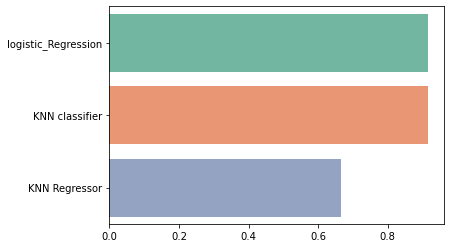

In [41]:
sns.barplot(y="Algorithm name",x="Accuracy",data=d,palette="Set2")

   ## With KNN mean_squared_error
   ##  LogisticRegression mean_squared_error
   ## KNN mean_absolute_error
   ## LogisticRegression mean_absolute_error 	

In [42]:
lreg_mse=mean_squared_error(ytest,lreg_pred)
lreg_mae=mean_absolute_error(ytest,lreg_pred)
lreg_r2=r2_score(ytest,lreg_pred)
print("LogisticRegression mean_squared_error(MSE): ",lreg_mse)
print("LogisticRegression mean_absolute_error(MAE): ",lreg_mae)
print("LogisticRegression r2_score:",lreg_r2)

LogisticRegression mean_squared_error(MSE):  0.08333333333333333
LogisticRegression mean_absolute_error(MAE):  0.08333333333333333
LogisticRegression r2_score: 0.5555555555555556


In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [44]:
knn_mse=mean_squared_error(ytest,knn_pred)
knn_mae=mean_absolute_error(ytest,knn_pred)
knn_r2=r2_score(ytest,knn_pred)
print("KNN mean_squared_error=",knn_mse)
print("KNN mean_absolute_error=",knn_mae)
print("KNN r2_score=",knn_r2)


KNN mean_squared_error= 0.08333333333333333
KNN mean_absolute_error= 0.08333333333333333
KNN r2_score= 0.5555555555555556


In [45]:
data = {'Name': ['KNN mean_squared_error','LogisticRegression mean_squared_error',
              'KNN mean_absolute_error','LogisticRegression mean_absolute_error',
              'KNN r2_score','LogisticRegression r2_score','KNN_score','logistic_score'],
     'Accuracy': [knn_mse,lreg_mse, knn_mae,lreg_mae,knn_r2,lreg_r2,knn_r2,logistic_score]}
df_after_pred = pd.DataFrame(data=data)

In [46]:
df_after_pred

,Name,Accuracy
0,KNN mean_squared_error,0.083333
1,LogisticRegression mean_squared_error,0.083333
2,KNN mean_absolute_error,0.083333
3,LogisticRegression mean_absolute_error,0.083333
4,KNN r2_score,0.555556
5,LogisticRegression r2_score,0.555556
6,KNN_score,0.555556
7,logistic_score,0.916667


<AxesSubplot:xlabel='Accuracy', ylabel='Name'>

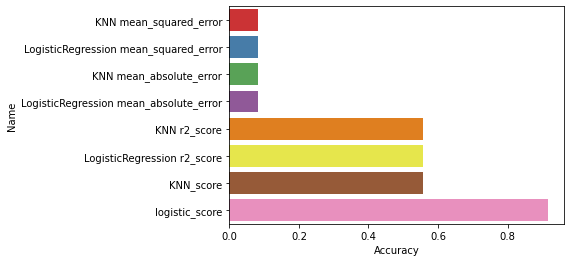

In [47]:
sns.barplot(y="Name", x="Accuracy", data=df_after_pred,palette='Set1')